# Mini Project - Classification of Wind Turbine Alarms
To start I will first look at the alarm data, and 1 quarter worth of data

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import sklearn
import seaborn as sns
from pandas import DataFrame
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
# pd.show_versions()

In [16]:
# path = 'C:\\Users\\kthomas\\Google Drive\\SMU\\DataMining\\MiniProject\\Data\\'
# path = '~/Documents/thomaskh522@gmail.com/SMU/DataMining/MiniProject/Data/'
# path = 'D:/Pattern/' # casey home
# path = 'O:/wpshistory_LOGANSGAP/' # casey work
# path = 'C:\\Users\\SARAH\\Dropbox\\SMU\\SMU\\7331DataMining\\MiniProject1\\'
alarms_desc = pd.read_csv('Siemens_Fault_Code_Descriptions.csv')
scada = pd.read_csv("SCADAcombined2017Q1.csv")
#q2 = pd.read_csv(path + "SCADAcombined2017Q2.csv")
#q3 = pd.read_csv(path + "SCADAcombined2017Q3.csv")
#q4 = pd.read_csv(path + "SCADAcombined2017Q4.csv")
print('alarm description shape:',alarms_desc.shape)
print('scada data shape:',scada.shape)

alarm description shape: (2141, 3)
scada data shape: (1111023, 79)


In [17]:
# drop columns that were missing values
scada.dropna(thresh=10000,axis=1,inplace=True)

colsdrop = ['XPos', 'YPos', 'wtc_ActPower_min',
           'wtc_ActPower_max', 'wtc_ActPower_stddev',
           'wtc_AmpPhR_min', 'wtc_AmpPhR_max', 'wtc_AmpPhR_mean',
           'wtc_AmpPhR_stddev', 'wtc_AmpPhS_min', 'wtc_AmpPhS_max',
           'wtc_AmpPhS_mean', 'wtc_AmpPhS_stddev', 'wtc_AmpPhT_min',
           'wtc_AmpPhT_max', 'wtc_AmpPhT_mean', 'wtc_AmpPhT_stddev',
           'wtc_RawPower_min', 'wtc_RawPower_max', 'wtc_RawPower_mean',
           'wtc_RawPower_stddev', 'wtc_YawPos_mean', 'wtc_GenRpm_mean',
           'wtc_MainSRpm_mean', 'wtc_PitchRef_BladeA_mean',
           'wtc_PitchRef_BladeB_mean', 'wtc_PitchRef_BladeC_mean','wtc_TwrHumid_mean', 
            'wtc_PitcPosA_mean','wtc_PitcPosB_mean', 'wtc_PitcPosC_mean']

scada.drop(colsdrop,axis=1,inplace=True)

print('scada data shape:',scada.shape)

scada.isnull().sum()

scada data shape: (1111023, 41)


TimeStamp                   0
Name                        0
StationId                   0
CommunicationId             0
NeighbourId                 0
NeighbourIdTwo              0
wtc_ActPower_mean          82
wtc_BoostAva_mean         103
wtc_PowerRef_endvalue      81
wtc_AcWindSp_mean          82
wtc_AcWindSp_stddev        82
wtc_NacelPos_mean          83
wtc_AmbieTmp_mean          83
wtc_GeOilTmp_mean          83
wtc_HubTemp_mean           83
wtc_NacelTmp_mean          83
wtc_ConvWTmp_mean          82
wtc_HydOilTm_mean          83
wtc_MainBTmp_mean          83
wtc_AlarmCde_endvalue      83
wtc_ScInOper_timeon        83
wtc_BoostKWh_endvalue     102
WS_Thies_80m_Avg            0
WS_Thies_80m_Std            0
WS_Thies_60m_Avg            0
WS_Thies_60m_Std            0
WS_Thies_26m_Avg            0
WS_Thies_26m_Std            0
WindDir_ICEFREE_D1_WVT      0
WindDir_Angle_3D_Avg        0
WindDir_Angle_3D_Std        0
WindDir_76m_D1_WVT          0
WindDir_76m_SD1_WVT         0
WindDir_An

In [18]:
# Clean Up Data

scada.dropna(inplace=True)
scada['wtc_AlarmCde_endvalue'] = scada['wtc_AlarmCde_endvalue'].astype(int)

scada['WindSpeed_adj'] = scada['wtc_AcWindSp_mean'].round(1)

# Recode column
alarms_desc = alarms_desc.rename(columns={'Fault Type': 'Fault_Type'})
alarms_desc['Fault_Type'] = alarms_desc['Fault_Type'].replace('1','Fault')
alarms_desc['Fault_Type'] = alarms_desc['Fault_Type'].replace('W','Warning')


In [19]:
# merge the alarms with the alarm descriptions
df = scada.merge(alarms_desc, 
         left_on = 'wtc_AlarmCde_endvalue', 
         right_on="Code",
         how='left')

# del alarms_desc

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)
df.index


#df.info()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StationId,1115319.0,4.400779e+01,25.079161,1.000000e+00,2.200000e+01,4.400000e+01,6.600000e+01,8.700000e+01
CommunicationId,1115319.0,2.309002e+06,25.079162,2.308959e+06,2.308980e+06,2.309002e+06,2.309024e+06,2.309045e+06
NeighbourId,1115319.0,4.401112e+01,24.893839,2.000000e+00,2.300000e+01,4.300000e+01,6.500000e+01,8.600000e+01
NeighbourIdTwo,1115319.0,4.464938e+01,24.661117,1.000000e+00,2.400000e+01,4.400000e+01,6.600000e+01,8.700000e+01
wtc_ActPower_mean,1115319.0,1.134450e+03,787.900357,-4.383652e+01,4.209523e+02,1.063747e+03,1.862220e+03,2.426992e+03
wtc_BoostAva_mean,1115319.0,4.749332e+00,21.980014,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.150000e+02
wtc_PowerRef_endvalue,1115319.0,1.812943e+03,627.096937,0.000000e+00,1.373000e+03,2.227000e+03,2.300000e+03,2.300000e+03
wtc_AcWindSp_mean,1115319.0,8.356720e+00,3.404653,0.000000e+00,5.950661e+00,8.239340e+00,1.073740e+01,2.327238e+01
wtc_AcWindSp_stddev,1115319.0,1.126834e+00,0.487228,0.000000e+00,7.725030e-01,1.070818e+00,1.398857e+00,6.623169e+00
wtc_NacelPos_mean,1115319.0,1.850995e+02,93.862880,0.000000e+00,1.348753e+02,1.907155e+02,2.425719e+02,3.600000e+02


In [55]:
# Create new variables

#derate = (df['wtc_ActPower_mean'] == df['wtc_PowerRef_endvalue']) & (df['wtc_PowerRef_endvalue'] < 2300)
derate = (df['wtc_PowerRef_endvalue'] < 2300)

df['Derated'] = [1 if x == True else 0 for x in derate]

available = (df['Fault_Type'] != 'Fault') & (df['wtc_ScInOper_timeon'] == 600)
df['Available'] = [1 if x == True else 0 for x in available]

df['Air_density'] = (df['BP_mbar_76m_Avg']*100)/((df['AirTC_3m_Avg']+273.15)*287.05)

# df['MainBearingFault'] = [1 if x == 64038 else 0 for x in df['Code']]

In [56]:
# # Derate Histogram

# y1 = df['wtc_PowerRef_endvalue'][df['Derated'] == 1]
# y2 = df['wtc_PowerRef_endvalue'][df['Derated'] == 0]

# # x3 = pcurve.index.values
# # y3 = pcurve['ExpectedEnergy_ref']

# plt.figure(figsize=(20, 10))
# plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
# plt.rc('font', size=20)          # controls default text sizes
# plt.rc('axes', titlesize=20)     # fontsize of the axes title
# plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
# plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
# plt.rc('legend', fontsize=20)    # legend fontsize
# plt.rc('figure', titlesize=30)  # fontsize of the figure title

# plt.hist(y1, alpha=0.5, label='y1')
# plt.hist(y2, alpha=0.5, label='y2')
# # plt.plot(x3, y3, linestyle = 'dashed', label='Reference')
# #plt.axhline(y=2300, color='k')
# plt.title("Derate")
# # plt.xlabel('Date')
# plt.ylabel('Count')
# plt.legend()
# plt.show()

,StationId,CommunicationId,NeighbourId,NeighbourIdTwo,wtc_ActPower_mean,wtc_BoostAva_mean,wtc_PowerRef_endvalue,wtc_AcWindSp_mean,wtc_AcWindSp_stddev,wtc_NacelPos_mean,...,WS_ICEFREE_Std,BP_mbar_76m_Avg,AirTC_3m_Avg,RH_76m_Avg,WindSpeed_adj,Code,Derated,Available,Air_density,Turbulence
count,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,...,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.114539e+06,1.115319e+06,1.115319e+06,1.115319e+06,1.115174e+06
mean,4.400779e+01,2.309002e+06,4.401112e+01,4.464938e+01,1.134450e+03,4.749332e+00,1.812943e+03,8.356720e+00,1.126834e+00,1.850995e+02,...,8.292543e-01,9.499854e+02,1.296029e+01,8.154280e+01,8.356679e+00,2.961072e+02,5.260083e-01,9.124457e-01,1.157692e+00,1.654416e-01
std,2.507916e+01,2.507916e+01,2.489384e+01,2.466112e+01,7.879004e+02,2.198001e+01,6.270969e+02,3.404653e+00,4.872284e-01,9.386288e+01,...,4.151762e-01,6.820422e+00,7.825947e+00,2.360854e+01,3.404793e+00,3.224361e+03,4.993233e-01,2.826458e-01,3.658049e-02,2.477084e-01
min,1.000000e+00,2.308959e+06,2.000000e+00,1.000000e+00,-4.383652e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,9.300000e+02,-1.292000e+01,3.533000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.066501e+00,0.000000e+00
25%,2.200000e+01,2.308980e+06,2.300000e+01,2.400000e+01,4.209523e+02,0.000000e+00,1.373000e+03,5.950661e+00,7.725030e-01,1.348753e+02,...,5.180000e-01,9.450000e+02,7.504000e+00,6.099000e+01,6.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.131667e+00,9.697019e-02
50%,4.400000e+01,2.309002e+06,4.300000e+01,4.400000e+01,1.063747e+03,0.000000e+00,2.227000e+03,8.239340e+00,1.070818e+00,1.907155e+02,...,7.810000e-01,9.500000e+02,1.305000e+01,8.140000e+01,8.200000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.153967e+00,1.374932e-01
75%,6.600000e+01,2.309024e+06,6.500000e+01,6.600000e+01,1.862220e+03,0.000000e+00,2.300000e+03,1.073740e+01,1.398857e+00,2.425719e+02,...,1.064000e+00,9.550000e+02,1.864000e+01,1.002000e+02,1.070000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.180564e+00,1.905795e-01
max,8.700000e+01,2.309045e+06,8.600000e+01,8.700000e+01,2.426992e+03,1.150000e+02,2.300000e+03,2.327238e+01,6.623169e+00,3.600000e+02,...,3.804000e+00,9.710000e+02,3.194000e+01,1.277000e+02,2.330000e+01,6.410100e+04,1.000000e+00,1.000000e+00,1.295867e+00,4.199650e+01


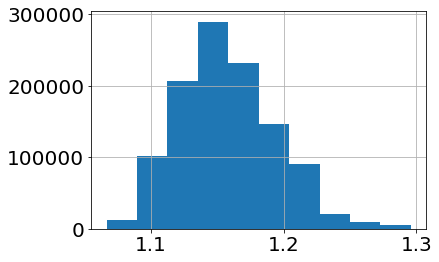

In [66]:
df['Air_density'].hist()
df.describe()

In [32]:
pd.crosstab(df['Available'],df['Fault Type'])

KeyError: 'Fault Type'

In [33]:
# use smaller dataset to test

#turbines = ['T003','T062','T093']
turbines = ['T014']
#turbines = ['T003','T009','T014','T015','T022','T056','T071'] # known main bearing failures

df2 = df.loc[(df['Name'].isin(turbines)) & (df['Available'] == 1) & (df['Derated'] == 0)]

df2.shape
# df3 = df2['2017-1-10':'2017-1-31']

(5628, 47)

In [34]:
cols = ['wtc_ActPower_mean','wtc_PowerRef_endvalue']
df3 = df2[cols].resample('D').median()
df3.shape

(89, 2)

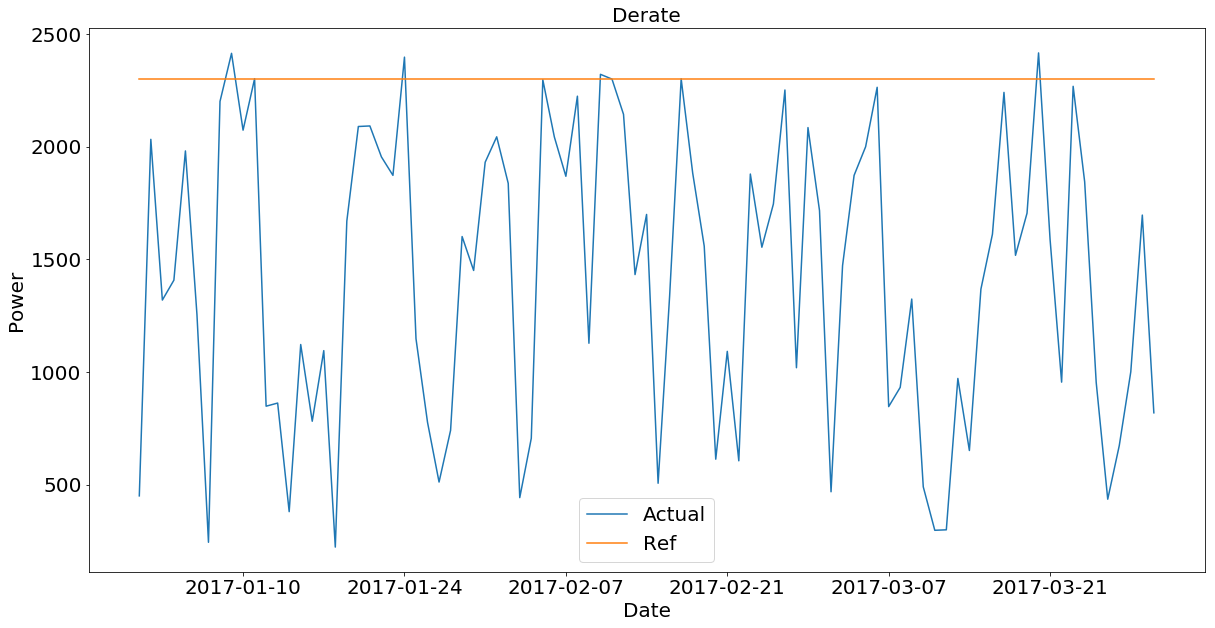

In [35]:
# Derate 

cols = ['wtc_ActPower_mean','wtc_PowerRef_endvalue']
df3 = df2[cols].resample('D').median()

x1 = df3.index.values
y1 = df3['wtc_ActPower_mean']

x2 = x1
y2 = df3['wtc_PowerRef_endvalue']

# x3 = pcurve.index.values
# y3 = pcurve['ExpectedEnergy_ref']

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

plt.plot(x1, y1, label='Actual')
plt.plot(x2, y2, label='Ref')
# plt.plot(x3, y3, linestyle = 'dashed', label='Reference')
#plt.axhline(y=2300, color='k')
plt.title("Derate")
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.show()

In [36]:
pcurvemax = df2.groupby('WindSpeed_adj').max()
pcurve75 = df2.groupby('WindSpeed_adj').quantile(q=0.75)
pcurve50 = df2.groupby('WindSpeed_adj').median()
pcurve25 = df2.groupby('WindSpeed_adj').quantile(q=0.25)
pcurvemin = df2.groupby('WindSpeed_adj').min()

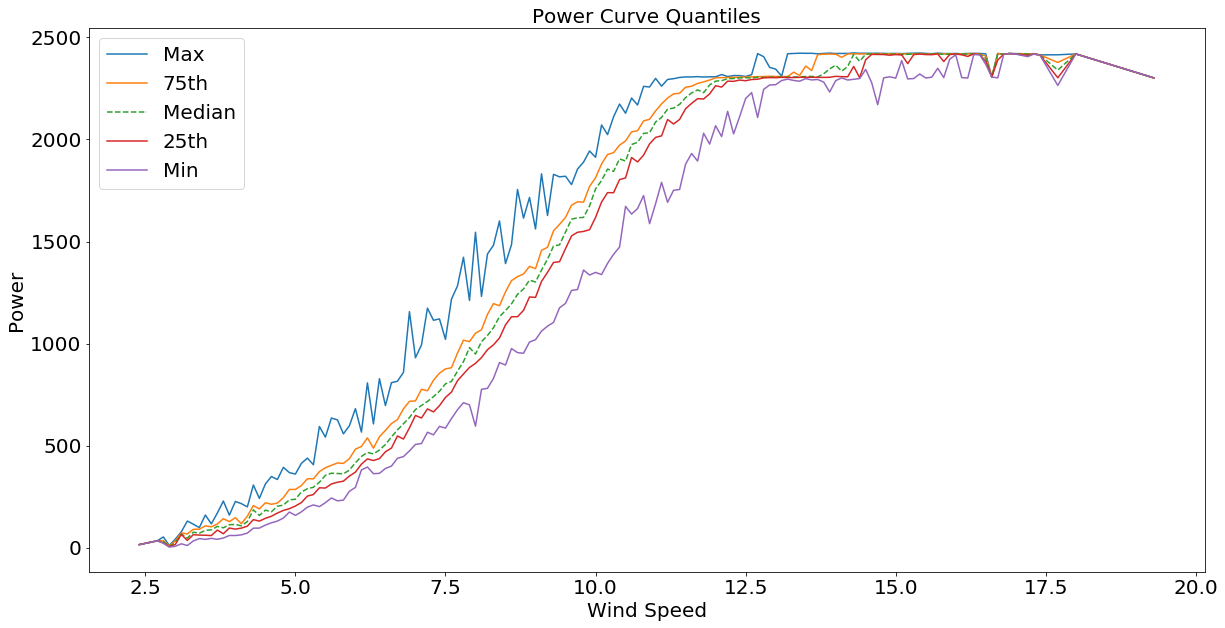

In [37]:
x1 = pcurvemax.index.values
y1 = pcurvemax['wtc_ActPower_mean'] 

x2 = pcurve75.index.values
y2 = pcurve75['wtc_ActPower_mean'] 

x3 = pcurve50.index.values
y3 = pcurve50['wtc_ActPower_mean'] 

x4 = pcurve25.index.values
y4 = pcurve25['wtc_ActPower_mean'] 

x5 = pcurvemin.index.values
y5 = pcurvemin['wtc_ActPower_mean'] 

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

plt.plot(x1, y1, label='Max')
plt.plot(x2, y2, label='75th')
plt.plot(x3, y3, linestyle = 'dashed', label='Median')
plt.plot(x4, y4, label='25th')
plt.plot(x5, y5, label='Min')

# plt.axhline(y=2300, color='k')
plt.title("Power Curve Quantiles")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

In [38]:
x1 = pcurve.index.values
y1 = pcurve['ExpectedEnergy_median'] #pcurve['wtc_ActPower_mean']

x2 = pcurve.index.values
y2 = pcurve['ExpectedEnergy_max'] #pcurvemax['wtc_ActPower_mean']

x3 = pcurve.index.values
y3 = pcurve['ExpectedEnergy_ref']

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

plt.plot(x1, y1, label='Median')
plt.plot(x2, y2, label='Maximum')
plt.plot(x3, y3, linestyle = 'dashed', label='Reference')
# plt.axhline(y=2300, color='k')
plt.title("Power Curve Variations")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.show()

NameError: name 'pcurve' is not defined

In [39]:
def PowerCurve(wind, x0,k,cap):
    y = cap / (1 + np.exp(-k*(wind-x0)))
    return y


In [40]:
df2['ExpectedEnergy_ref'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], x0=7.70514731, k=0.85471648, cap=2300), axis = 1)
df2['ExpectedEnergy_max'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], x0=7.59839901, k=0.65526381,cap=2400), axis = 1)
df2['ExpectedEnergy_median'] = df2.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], x0=8.52821554, k=0.66779164, cap=2400), axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [41]:
df2['Residual_ref'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_ref']
df2['Residual_max'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_max']
df2['Residual_median'] = df2['wtc_ActPower_mean'] - df2['ExpectedEnergy_median']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

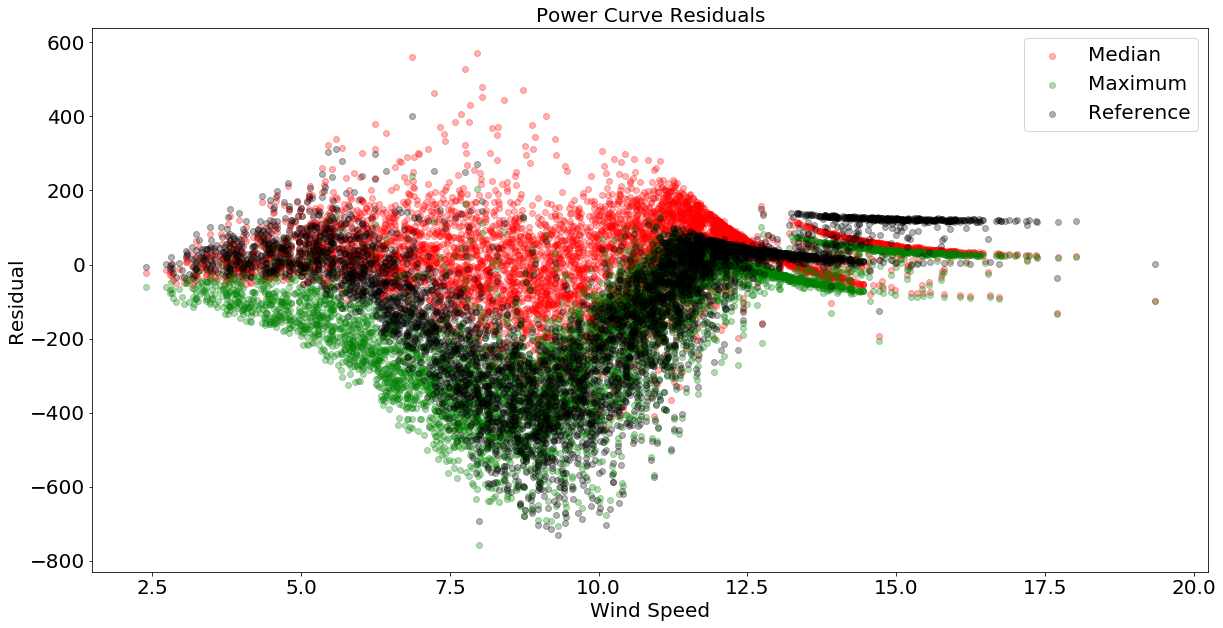

In [42]:
x1 = df2['wtc_AcWindSp_mean']
y1 = df2['Residual_median'] 

x2 = df2['wtc_AcWindSp_mean']
y2 = df2['Residual_max'] 

x3 = df2['wtc_AcWindSp_mean']
y3 = df2['Residual_ref']

plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

plt.scatter(x1, y1,alpha=0.3, label='Median', c='r')
plt.scatter(x2, y2,alpha=0.3, label='Maximum', c='g')
plt.scatter(x3, y3,alpha=0.3, label='Reference', c='k')
# plt.axhline(y=2300, color='k')
plt.title("Power Curve Residuals")
plt.xlabel('Wind Speed')
plt.ylabel('Residual')
plt.legend()
plt.show()

## Visualizations

In [43]:
cols = ['wtc_ActPower_mean', 'wtc_GenRpm_mean',
       'wtc_MainSRpm_mean', 'wtc_TwrHumid_mean', 'wtc_PowerRef_endvalue',
       'wtc_AcWindSp_mean', 'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean',
       'wtc_GeOilTmp_mean', 'wtc_HubTemp_mean', 'wtc_NacelTmp_mean',
       'wtc_ConvWTmp_mean', 'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean',
       'wtc_AlarmCde_endvalue', 'wtc_ScInOper_timeon', 'BP_mbar_76m_Avg',
       'AirTC_3m_Avg', 'RH_76m_Avg', 'Code', 'Description', 'Fault Type',
       'Derate', 'Operational', 'MainBearingFault', 'Available', 'Efficiency']
df2[cols].plot(subplots=True, figsize=(20, 150));

KeyError: "['wtc_GenRpm_mean' 'wtc_MainSRpm_mean' 'wtc_TwrHumid_mean' 'Fault Type'\n 'Derate' 'Operational' 'MainBearingFault' 'Efficiency'] not in index"

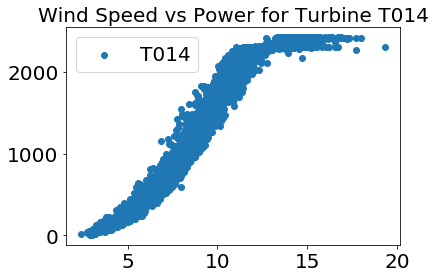

In [44]:
import matplotlib as mpl
# What are the columns
by_turbine = df2.groupby('Name')

x = df2['wtc_AcWindSp_mean']
y = df2['wtc_ActPower_mean']
color = df2['Available']


for name, group in by_turbine:
    plt.scatter(x, 
                y, 
                #c = color,
                label=name)
    plt.title("Wind Speed vs Power for Turbine " + str(name))
    plt.legend()
    plt.show()

## Power Curve Analysis

In [45]:
# Reference Curve
import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

ref = pd.read_csv(path + "LGW_RefPowerCurve.csv")

def sigmoid(x, x0, k):
    cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = ref['WindSpeed'].values
ydata = ref['Power'].values

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)

# xdata = df2['wtc_AcWindSp_mean'].values
# ydata = df2['wtc_ActPower_mean'].values

# popt, pcov = curve_fit(sigmoid, xdata, ydata)
# print(popt)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

NameError: name 'path' is not defined

In [46]:
# Historical Median

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve.index.values
ydata = pcurve['wtc_ActPower_mean'].values
cap = np.max(pcurve['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print('Cap=',cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

NameError: name 'pcurve' is not defined

[7.59839901 0.65526381]
Cap= 2423.161


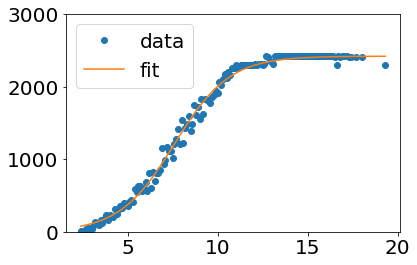

In [47]:
# Historical Maximum

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurvemax.index.values
ydata = pcurvemax['wtc_ActPower_mean'].values
cap = np.max(pcurvemax['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print('Cap=',cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

In [67]:
# create new variable for turbulence

# calculate turbulence WindSpd StdDv / WindSpd Mean

df['Turbulence'] = (df['wtc_AcWindSp_stddev'] / df['wtc_AcWindSp_mean'])



In [58]:
df.head(500)

,Name,StationId,CommunicationId,NeighbourId,NeighbourIdTwo,wtc_ActPower_mean,wtc_BoostAva_mean,wtc_PowerRef_endvalue,wtc_AcWindSp_mean,wtc_AcWindSp_stddev,...,AirTC_3m_Avg,RH_76m_Avg,WindSpeed_adj,Code,Description,Fault_Type,Derated,Available,Air_density,Turbulence
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-03-30 23:10:00,T021,23,2308981,24,25,1173.126000,0.0,1197.0,12.298120,0.826375,...,11.71,53.31,12.3,0.0,System faultless,Warning,1,1,1.150802,0.067195
2017-03-30 23:10:00,T022,24,2308982,23,25,1160.866000,0.0,1198.0,11.569270,0.818104,...,11.71,53.31,11.6,0.0,System faultless,Warning,1,1,1.150802,0.070714
2017-03-30 23:10:00,T023,25,2308983,24,26,1172.777000,0.0,1197.0,11.764790,0.950096,...,11.71,53.31,11.8,0.0,System faultless,Warning,1,1,1.150802,0.080758
2017-03-30 23:10:00,T024,26,2308984,25,24,1175.400000,0.0,1197.0,12.278140,0.700693,...,11.71,53.31,12.3,0.0,System faultless,Warning,1,1,1.150802,0.057068
2017-03-30 23:10:00,T032,27,2308985,2,28,1156.247000,0.0,1197.0,10.903910,0.949332,...,11.71,53.31,10.9,0.0,System faultless,Warning,1,1,1.150802,0.087063
2017-03-30 23:10:00,T033,28,2308986,27,29,1165.566000,0.0,1198.0,11.434470,0.828141,...,11.71,53.31,11.4,0.0,System faultless,Warning,1,1,1.150802,0.072425
2017-03-30 23:10:00,T034,29,2308987,28,30,1173.367000,0.0,1198.0,12.058820,0.892412,...,11.71,53.31,12.1,0.0,System faultless,Warning,1,1,1.150802,0.074005
2017-03-30 23:10:00,T035,30,2308988,29,1,1154.411000,0.0,1197.0,11.343610,0.746081,...,11.71,53.31,11.3,0.0,System faultless,Warning,1,1,1.150802,0.065771
2017-03-30 23:10:00,T036,31,2308989,32,33,1162.371000,0.0,1197.0,12.705130,1.043642,...,11.71,53.31,12.7,0.0,System faultless,Warning,1,1,1.150802,0.082143
